In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def probability_distribution(data, bins_interval=1, margin=1, title='Distribution'):
    bins = list(np.arange(min(data), max(data) + bins_interval*2, bins_interval))
    print(len(bins))
    #for i in range(0, len(bins)):
    #    print(bins[i])
    plt.xlim(min(data) - margin, max(data) + margin)
    plt.title(title)
    plt.xlabel('Interval')
    plt.ylabel('Distribution')
    prob,left,rectangle = plt.hist(x=data, bins=bins, normed=True, histtype='bar', color=['r'])
    for x, y in zip(left, prob):
        plt.text(x + bins_interval / 2, y + 0.003, '%.4f' % y, ha='center', va='top')


In [2]:
import pickle
with open('../holes_github_dict.pkl','rb') as f:
    holes = pickle.load(f)

In [3]:
with open('../pids_github.pkl','rb') as f:
    pos_pids = pickle.load(f)
with open('../deleted_pids.pkl','rb') as f:
    neg_pids = pickle.load(f)
    
pos_pids = list(set(pos_pids) - set(neg_pids))

In [40]:
import utils
#reload(utils)
from utils import sen_parse
import pkuseg

pos_months = []
neg_months = []
pos_hours = []
neg_hours = []
pos_wordlen = []
neg_wordlen = []
pos_textlen = []
neg_textlen = []

seg = pkuseg.pkuseg(model_name='web')


In [53]:
pos_months = []
pos_hours = []
pos_wordlen = []
pos_textlen = []
for posid in pos_pids:
    hole = holes[posid]
    pos_months.append(hole['time']['month'])
    pos_hours.append(hole['time']['hour'])
    words = sen_parse(hole['dz_text'], seg)
    pos_textlen.append(len(words))
    words = [len(w) for w in words if len(w)<9]
    pos_wordlen.append(sum(words)/len(words) if len(words)>0 else -0.5)

In [42]:
neg_months = []
neg_hours = []
neg_wordlen = []
neg_textlen = []
for negid in neg_pids:
    hole = holes[negid]
    neg_months.append(hole['time']['month'])
    neg_hours.append(hole['time']['hour'])
    words = sen_parse(hole['dz_text'], seg)
    neg_textlen.append(len(words))
    words = [len(w) for w in words if len(w)<9]
    neg_wordlen.append(sum(words)/len(words) if len(words)>0 else -0.5)

13
13


D:\Anaconda3\envs\pytorch36\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


13


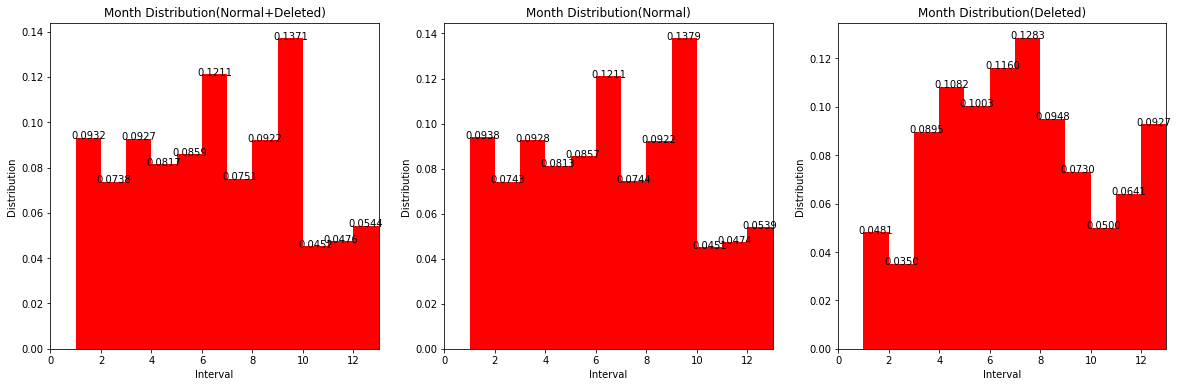

In [65]:
#bins1 = np.arange(1, 13)
plt.figure(figsize=(20,6))
plt.subplot(131)
probability_distribution(data=pos_months+neg_months, bins_interval=1, title='Month Distribution(Normal+Deleted)')
plt.subplot(132)
probability_distribution(data=pos_months, bins_interval=1, title='Month Distribution(Normal)')
plt.subplot(133)
probability_distribution(data=neg_months, bins_interval=1, title='Month Distribution(Deleted)')
plt.show()

25
25


D:\Anaconda3\envs\pytorch36\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


25


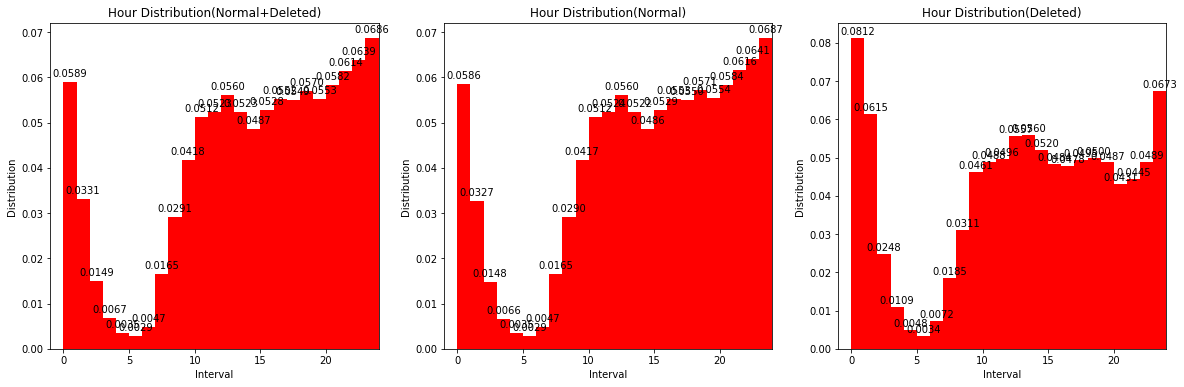

In [66]:
#bins2 = np.arange(25)
plt.figure(figsize=(20,6))
plt.subplot(131)
probability_distribution(data=pos_hours+neg_hours, bins_interval=1, title='Hour Distribution(Normal+Deleted)')
plt.subplot(132)
probability_distribution(data=pos_hours, bins_interval=1, title='Hour Distribution(Normal)')
plt.subplot(133)
probability_distribution(data=neg_hours, bins_interval=1, title='Hour Distribution(Deleted)')
plt.show()

-0.5
8.0
22


D:\Anaconda3\envs\pytorch36\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


22
22


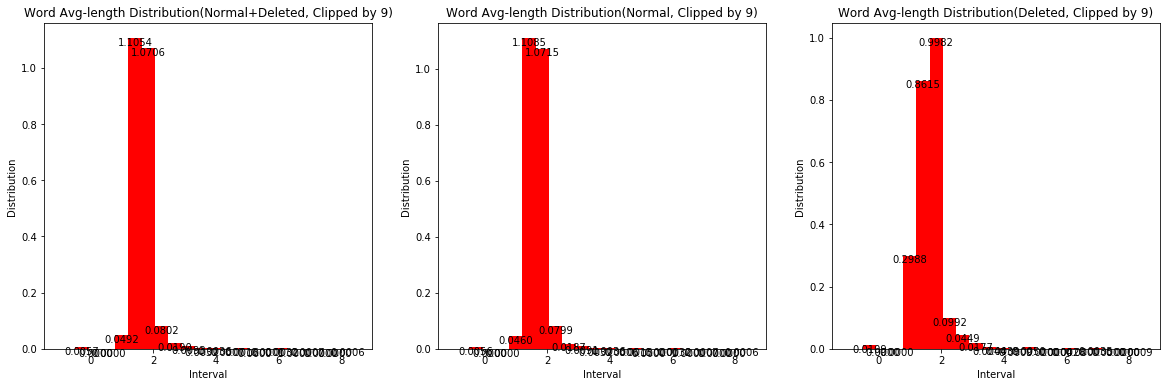

In [67]:
min_wordlen = min(min(pos_wordlen), min(neg_wordlen))
max_wordlen = max(max(pos_wordlen), max(neg_wordlen))
bins_interval = (max_wordlen-min_wordlen)/20
print(min_wordlen)
print(max_wordlen)
#bins3 = np.arange()
plt.figure(figsize=(20,6))
plt.subplot(131)
probability_distribution(data=pos_wordlen+neg_wordlen, bins_interval=bins_interval, title='Word Avg-length Distribution(Normal+Deleted, Clipped by 9)')
plt.subplot(132)
probability_distribution(data=pos_wordlen, bins_interval=bins_interval, title='Word Avg-length Distribution(Normal, Clipped by 9)')
plt.subplot(133)
probability_distribution(data=neg_wordlen, bins_interval=bins_interval, title='Word Avg-length Distribution(Deleted, Clipped by 9)')
plt.show()

1
741
22


D:\Anaconda3\envs\pytorch36\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


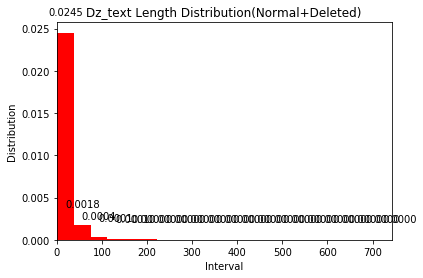

22


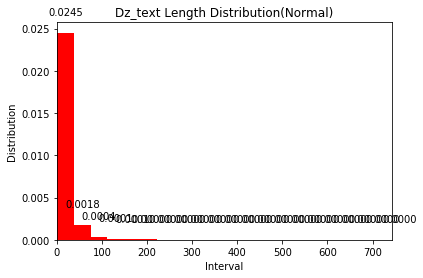

22


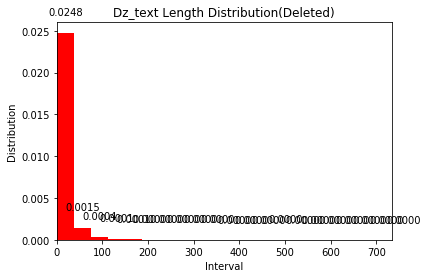

In [57]:
min_textlen = min(min(pos_textlen), min(neg_textlen))
max_textlen = max(max(pos_textlen), max(neg_textlen))
bins_interval = (max_textlen-min_textlen)/20
print(min_textlen)
print(max_textlen)
probability_distribution(data=pos_textlen+neg_textlen, bins_interval=bins_interval, title='Dz_text Length Distribution(Normal+Deleted)')
probability_distribution(data=pos_textlen, bins_interval=bins_interval, title='Dz_text Length Distribution(Normal)')
probability_distribution(data=neg_textlen, bins_interval=bins_interval, title='Dz_text Length Distribution(Deleted)')

22
22


D:\Anaconda3\envs\pytorch36\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


22


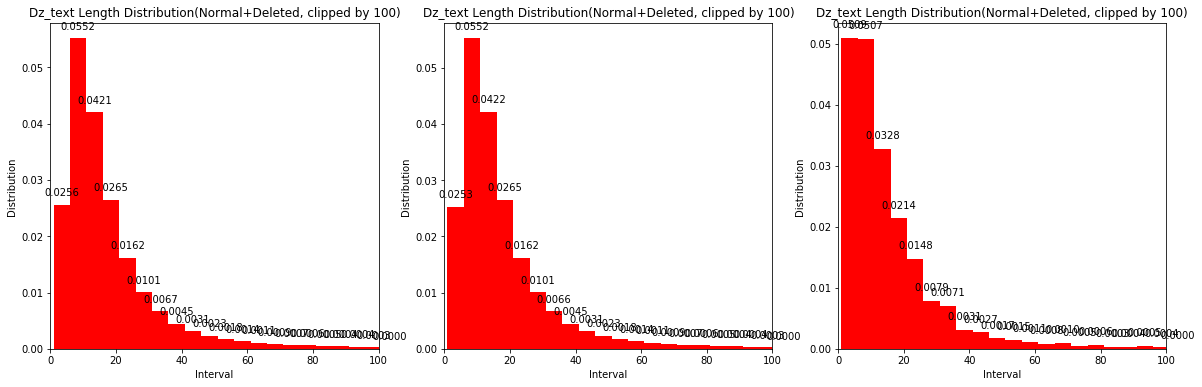

In [68]:
pos_textlen2 = [l for l in pos_textlen if l < 100]
neg_textlen2 = [l for l in neg_textlen if l < 100]
plt.figure(figsize=(20,6))
plt.subplot(131)
probability_distribution(data=pos_textlen2+neg_textlen2, bins_interval=5, title='Dz_text Length Distribution(Normal+Deleted, clipped by 100)')
plt.subplot(132)
probability_distribution(data=pos_textlen2, bins_interval=5, title='Dz_text Length Distribution(Normal+Deleted, clipped by 100)')
plt.subplot(133)
probability_distribution(data=neg_textlen2, bins_interval=5, title='Dz_text Length Distribution(Normal+Deleted, clipped by 100)')
plt.show()